In [1]:
from signal_detector import SignalClassifier
from negbin import RecordGenerator
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [2]:
detector = SignalClassifier(nblocks=24, ksize=5, filters=32)
inputs = tf.keras.Input(shape=(None, 1))
outputs = detector(inputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, 1)]         0         
_________________________________________________________________
signal_classifier (SignalCla (None, None)              37101     
Total params: 37,101
Trainable params: 34,475
Non-trainable params: 2,626
_________________________________________________________________


In [9]:
model.load_weights("tmp_signal.h5")

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(
                learning_rate=1e-5,
                clipnorm=10.0),
              loss=tf.keras.losses.CosineSimilarity())

In [26]:
def plot_test_case():
    data = generator.generate()
    nbins = data['n_bins']
    h = np.arange(nbins)
    x = np.array(data['counts'], dtype=np.float32)
    x /= x.sum()
    signal = data['signal_normalized']
    eps = data['noise_ratio']
    y = (1.0 - eps) * signal / ((1.0 - eps) * signal + eps * (1.0 / nbins))
    
    xinput = np.expand_dims(x, -1)
    xinput = np.expand_dims(xinput, 0)
    
    yhat = np.squeeze(model(tf.constant(xinput)).numpy())
    r, nc, noise_disp = data['rounding'], data['n_comps'], data['noise_dispersion']
    N, eps, sig_disp = data['n_bins'], data['noise_ratio'], data['signal_overdispersion']
    
    plt.figure(figsize=(10, 4))
    viridis = cm.get_cmap('viridis', 12)
    plt.bar(h, x, color=viridis(y), width=1)
    plt.plot(h, signal, c="black")
    plt.title("Truth")
    plt.show()
    plt.figure(figsize=(10, 4))
    viridis = cm.get_cmap('viridis', 12)
    plt.bar(h, x, color=viridis(yhat), width=1)
    plt.plot(h, signal, c="black")
    plt.title("Predicted")
    plt.show()
    plt.figure(figsize=(10, 4))
    plt.title(f"round: {r}, ncomps: {nc}, noise_disp: {noise_disp:.2f}, noise: {eps:.2f}, sig_disp: {sig_disp:.2f}, nbins: {N}")
    plt.scatter(yhat, y)
    plt.xlabel("predicted")
    plt.ylabel("true")
    plt.show()
    
    return x, y, yhat

sim 1/500000, loss: -0.9692, losses_av: -0.9726, 


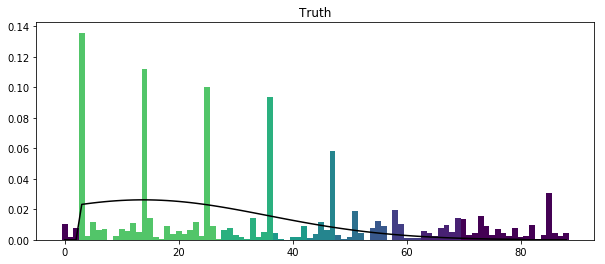

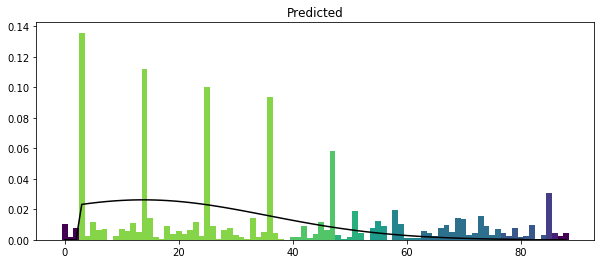

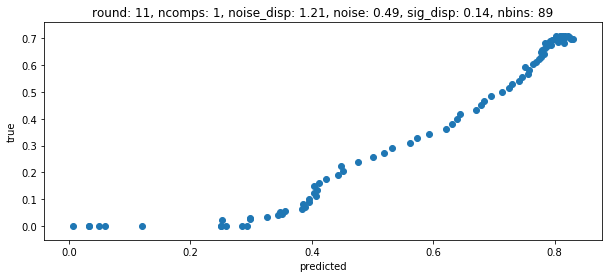

sim 10/500000, loss: -0.9802, losses_av: -0.9726, 
sim 20/500000, loss: -0.9804, losses_av: -0.9725, 
sim 30/500000, loss: -0.9772, losses_av: -0.9726, 
sim 40/500000, loss: -0.9762, losses_av: -0.9726, 
sim 50/500000, loss: -0.9736, losses_av: -0.9727, 
sim 60/500000, loss: -0.9833, losses_av: -0.9727, 
sim 70/500000, loss: -0.9758, losses_av: -0.9727, 
sim 80/500000, loss: -0.9814, losses_av: -0.9727, 
sim 90/500000, loss: -0.9776, losses_av: -0.9727, 
sim 100/500000, loss: -0.9733, losses_av: -0.9727, 


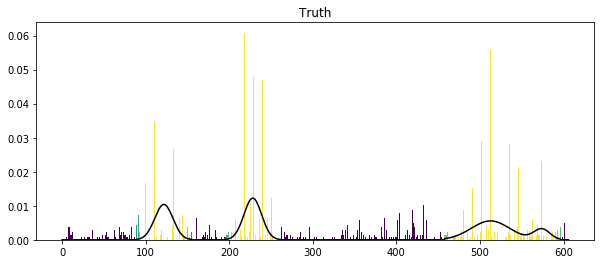

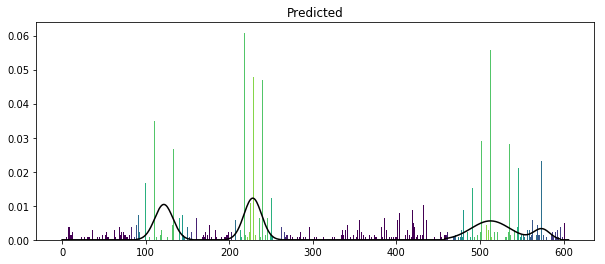

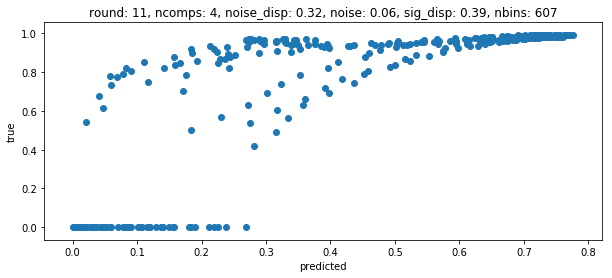

sim 110/500000, loss: -0.9590, losses_av: -0.9727, 
sim 120/500000, loss: -0.9672, losses_av: -0.9726, 
sim 130/500000, loss: -0.9784, losses_av: -0.9726, 
sim 140/500000, loss: -0.9833, losses_av: -0.9726, 
sim 150/500000, loss: -0.9782, losses_av: -0.9725, 
sim 160/500000, loss: -0.9739, losses_av: -0.9725, 
sim 170/500000, loss: -0.9680, losses_av: -0.9726, 
sim 180/500000, loss: -0.9816, losses_av: -0.9726, 
sim 190/500000, loss: -0.9808, losses_av: -0.9726, 
sim 200/500000, loss: -0.9794, losses_av: -0.9726, 


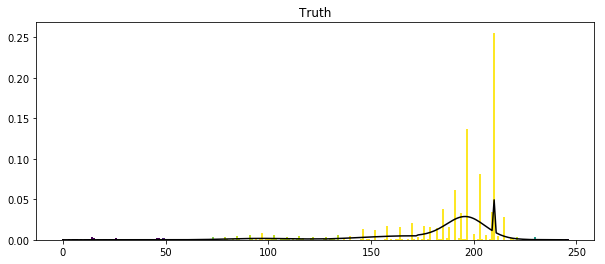

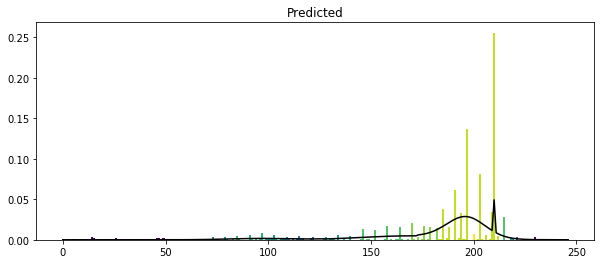

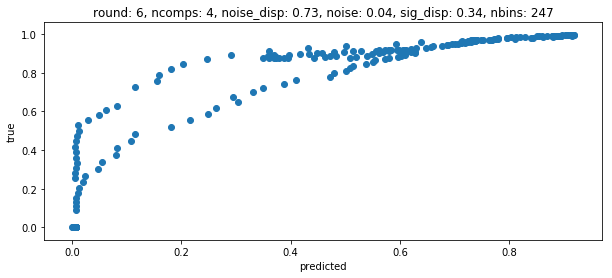

sim 210/500000, loss: -0.9831, losses_av: -0.9726, 
sim 220/500000, loss: -0.9730, losses_av: -0.9727, 
sim 230/500000, loss: -0.9603, losses_av: -0.9727, 
sim 240/500000, loss: -0.9767, losses_av: -0.9727, 
sim 250/500000, loss: -0.9759, losses_av: -0.9728, 
sim 260/500000, loss: -0.9784, losses_av: -0.9729, 
sim 270/500000, loss: -0.9477, losses_av: -0.9728, 
sim 280/500000, loss: -0.9780, losses_av: -0.9728, 
sim 290/500000, loss: -0.9756, losses_av: -0.9729, 
sim 300/500000, loss: -0.9631, losses_av: -0.9728, 


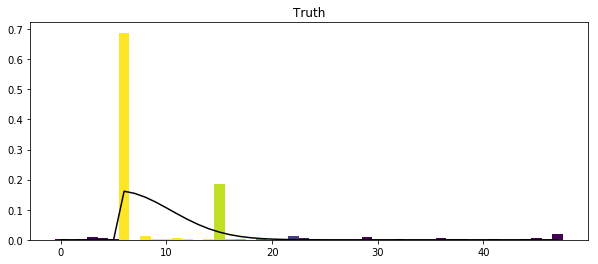

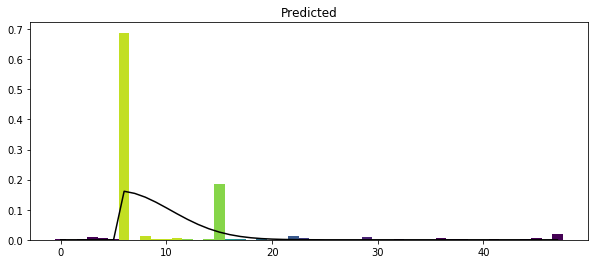

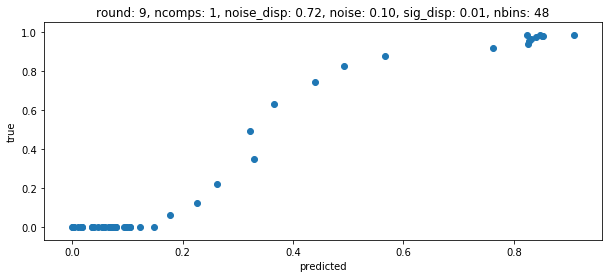

sim 310/500000, loss: -0.9781, losses_av: -0.9728, 
sim 320/500000, loss: -0.9761, losses_av: -0.9728, 
sim 330/500000, loss: -0.9613, losses_av: -0.9728, 
sim 340/500000, loss: -0.9735, losses_av: -0.9729, 
sim 350/500000, loss: -0.9765, losses_av: -0.9729, 
sim 360/500000, loss: -0.9615, losses_av: -0.9728, 
sim 370/500000, loss: -0.9478, losses_av: -0.9727, 
sim 380/500000, loss: -0.9823, losses_av: -0.9726, 
sim 390/500000, loss: -0.9701, losses_av: -0.9726, 
sim 400/500000, loss: -0.9702, losses_av: -0.9726, 


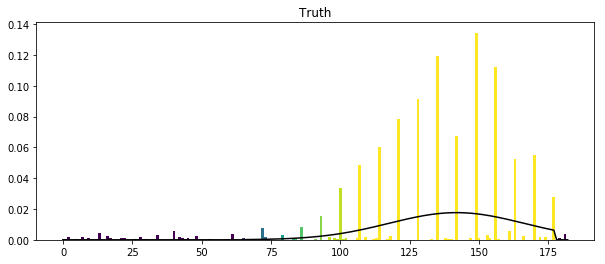

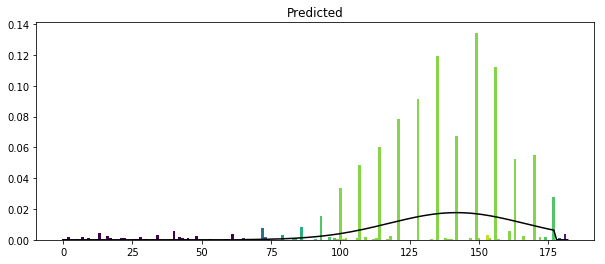

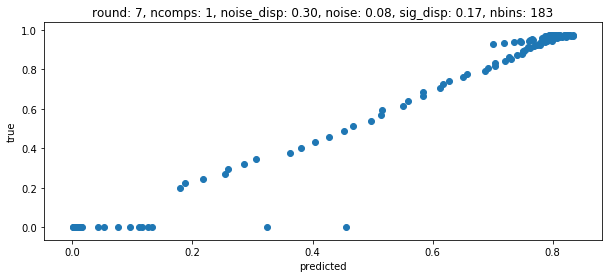

sim 410/500000, loss: -0.9533, losses_av: -0.9726, 
sim 420/500000, loss: -0.9701, losses_av: -0.9726, 
sim 430/500000, loss: -0.9796, losses_av: -0.9726, 
sim 440/500000, loss: -0.9759, losses_av: -0.9726, 
sim 450/500000, loss: -0.9753, losses_av: -0.9727, 
sim 460/500000, loss: -0.9692, losses_av: -0.9726, 
sim 470/500000, loss: -0.9670, losses_av: -0.9724, 
sim 480/500000, loss: -0.9744, losses_av: -0.9724, 
sim 490/500000, loss: -0.9769, losses_av: -0.9725, 
sim 500/500000, loss: -0.9821, losses_av: -0.9726, 


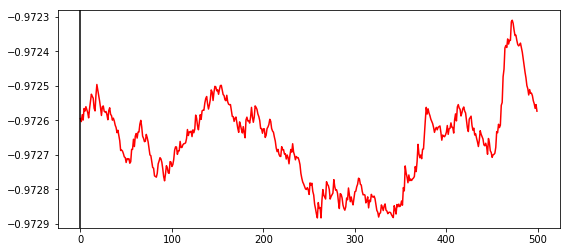

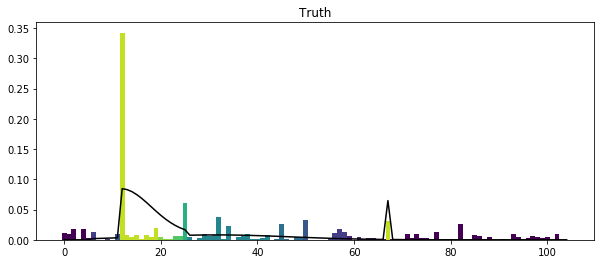

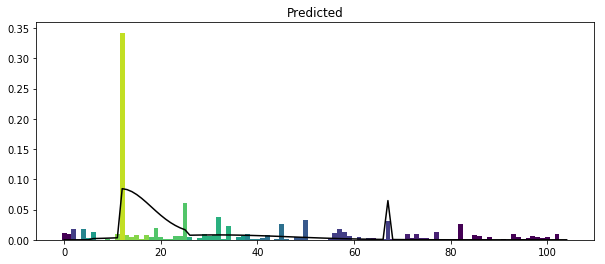

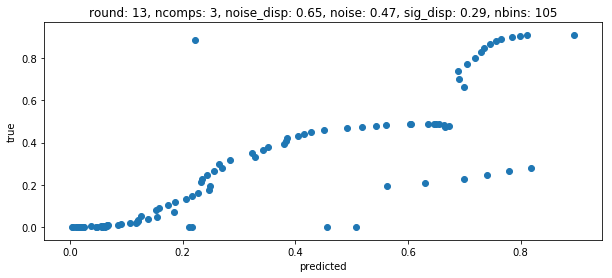

sim 510/500000, loss: -0.9786, losses_av: -0.9726, 
sim 520/500000, loss: -0.9712, losses_av: -0.9725, 
sim 530/500000, loss: -0.9798, losses_av: -0.9725, 
sim 540/500000, loss: -0.9769, losses_av: -0.9724, 
sim 550/500000, loss: -0.9807, losses_av: -0.9724, 
sim 560/500000, loss: -0.9558, losses_av: -0.9724, 
sim 570/500000, loss: -0.9741, losses_av: -0.9723, 
sim 580/500000, loss: -0.9840, losses_av: -0.9723, 
sim 590/500000, loss: -0.9860, losses_av: -0.9724, 
sim 600/500000, loss: -0.9877, losses_av: -0.9725, 


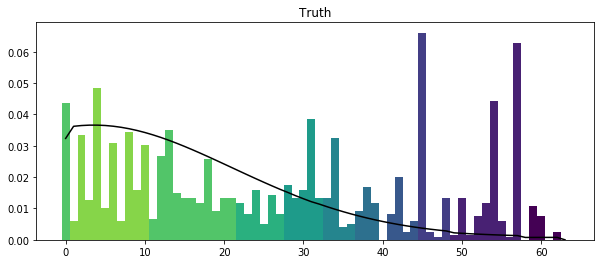

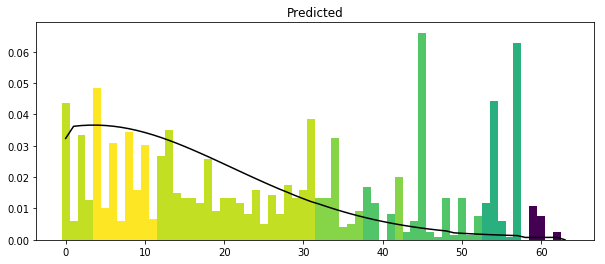

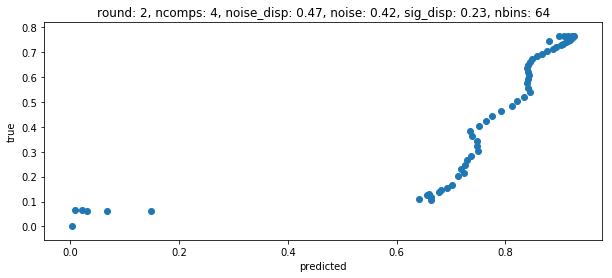

sim 610/500000, loss: -0.9711, losses_av: -0.9725, 
sim 620/500000, loss: -0.9788, losses_av: -0.9725, 
sim 630/500000, loss: -0.9777, losses_av: -0.9725, 
sim 640/500000, loss: -0.9755, losses_av: -0.9725, 
sim 650/500000, loss: -0.9519, losses_av: -0.9725, 
sim 660/500000, loss: -0.9798, losses_av: -0.9726, 
sim 670/500000, loss: -0.9690, losses_av: -0.9725, 
sim 680/500000, loss: -0.9733, losses_av: -0.9725, 
sim 690/500000, loss: -0.9860, losses_av: -0.9726, 
sim 700/500000, loss: -0.9727, losses_av: -0.9726, 


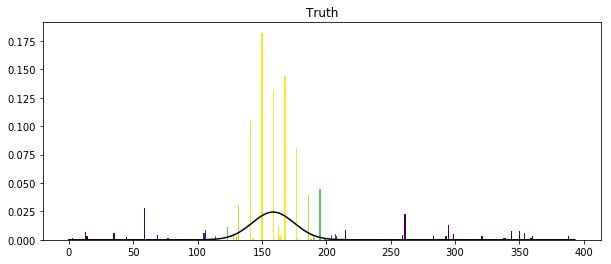

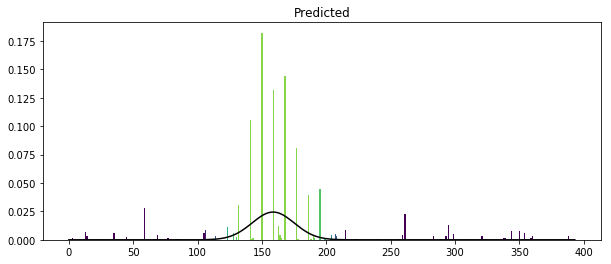

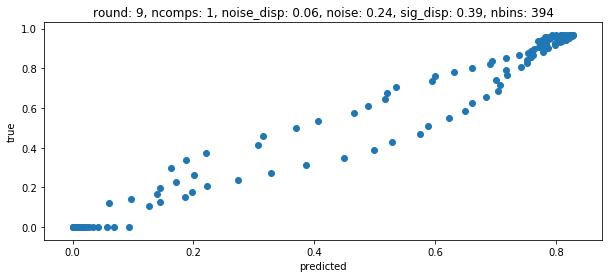

sim 710/500000, loss: -0.9755, losses_av: -0.9725, 
sim 720/500000, loss: -0.9728, losses_av: -0.9726, 
sim 730/500000, loss: -0.9672, losses_av: -0.9726, 
sim 740/500000, loss: -0.9817, losses_av: -0.9726, 
sim 750/500000, loss: -0.9780, losses_av: -0.9725, 
sim 760/500000, loss: -0.9811, losses_av: -0.9726, 
sim 770/500000, loss: -0.9678, losses_av: -0.9724, 
sim 780/500000, loss: -0.9827, losses_av: -0.9724, 
sim 790/500000, loss: -0.9788, losses_av: -0.9725, 
sim 800/500000, loss: -0.9718, losses_av: -0.9726, 


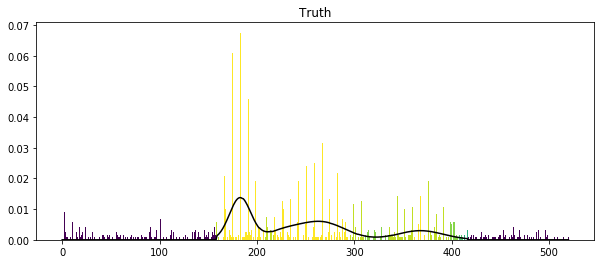

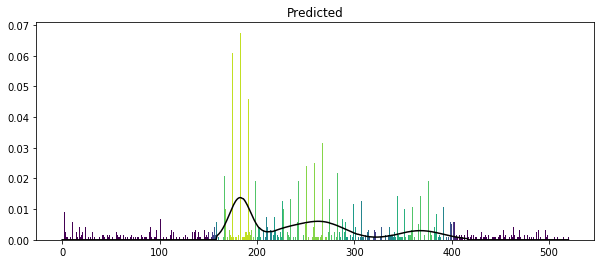

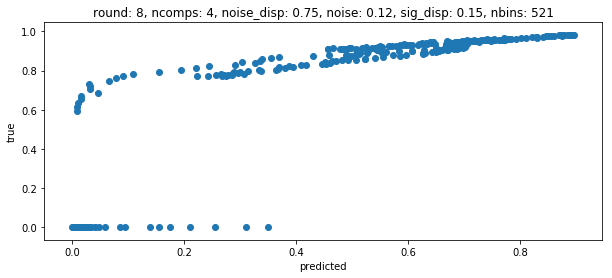

sim 810/500000, loss: -0.9505, losses_av: -0.9726, 
sim 820/500000, loss: -0.9751, losses_av: -0.9724, 
sim 830/500000, loss: -0.9827, losses_av: -0.9725, 
sim 840/500000, loss: -0.9775, losses_av: -0.9726, 
sim 850/500000, loss: -0.9762, losses_av: -0.9725, 
sim 860/500000, loss: -0.9837, losses_av: -0.9725, 
sim 870/500000, loss: -0.9567, losses_av: -0.9724, 
sim 880/500000, loss: -0.9451, losses_av: -0.9724, 
sim 890/500000, loss: -0.9730, losses_av: -0.9723, 
sim 900/500000, loss: -0.9716, losses_av: -0.9724, 


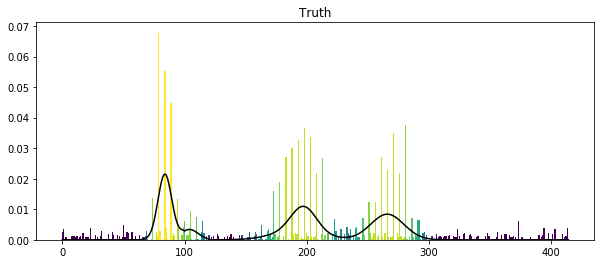

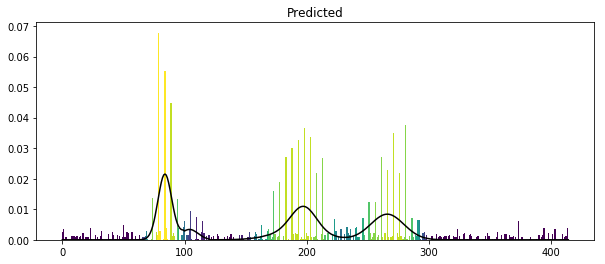

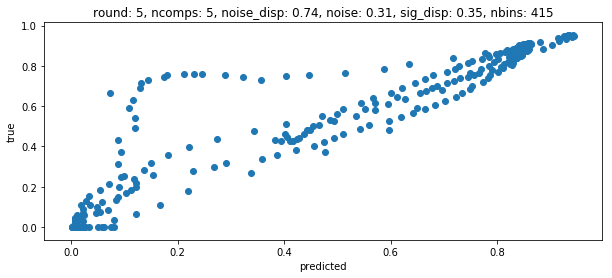

sim 910/500000, loss: -0.9634, losses_av: -0.9724, 
sim 920/500000, loss: -0.9593, losses_av: -0.9724, 
sim 930/500000, loss: -0.9677, losses_av: -0.9724, 
sim 940/500000, loss: -0.9776, losses_av: -0.9725, 
sim 950/500000, loss: -0.9833, losses_av: -0.9726, 
sim 960/500000, loss: -0.9858, losses_av: -0.9725, 
sim 970/500000, loss: -0.9784, losses_av: -0.9725, 
sim 980/500000, loss: -0.9824, losses_av: -0.9726, 
sim 990/500000, loss: -0.9747, losses_av: -0.9726, 
sim 1000/500000, loss: -0.9823, losses_av: -0.9726, 


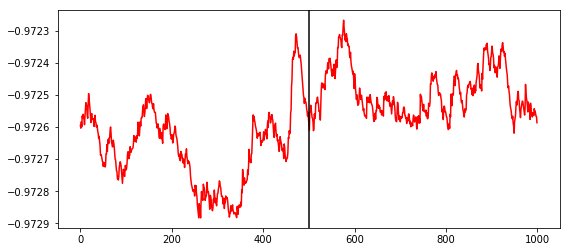

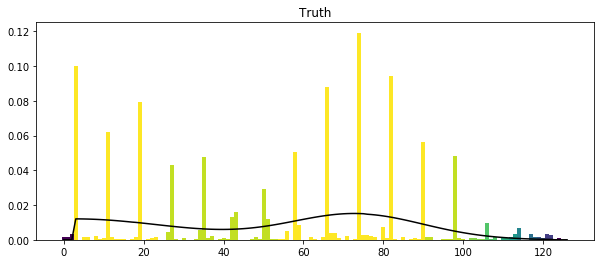

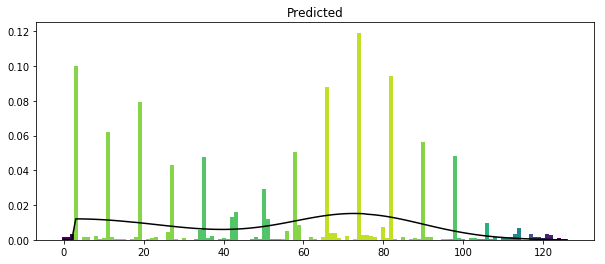

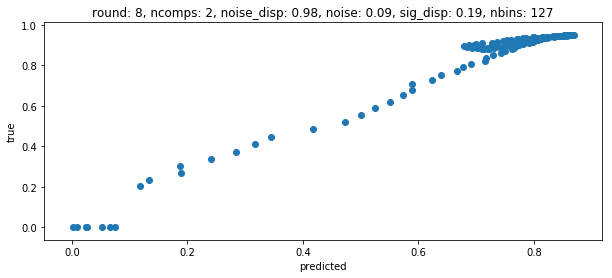

sim 1010/500000, loss: -0.9695, losses_av: -0.9726, 
sim 1020/500000, loss: -0.9771, losses_av: -0.9726, 
sim 1030/500000, loss: -0.9731, losses_av: -0.9725, 
sim 1040/500000, loss: -0.9780, losses_av: -0.9725, 
sim 1050/500000, loss: -0.9720, losses_av: -0.9726, 
sim 1060/500000, loss: -0.9800, losses_av: -0.9726, 
sim 1070/500000, loss: -0.9847, losses_av: -0.9726, 
sim 1080/500000, loss: -0.9713, losses_av: -0.9727, 
sim 1090/500000, loss: -0.9770, losses_av: -0.9727, 
sim 1100/500000, loss: -0.9559, losses_av: -0.9727, 


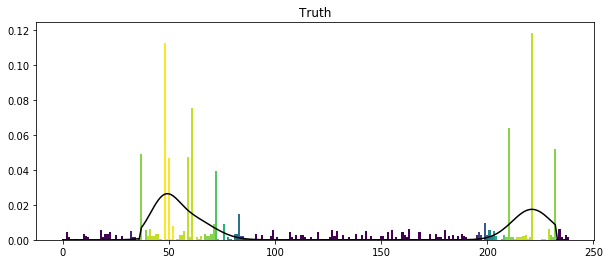

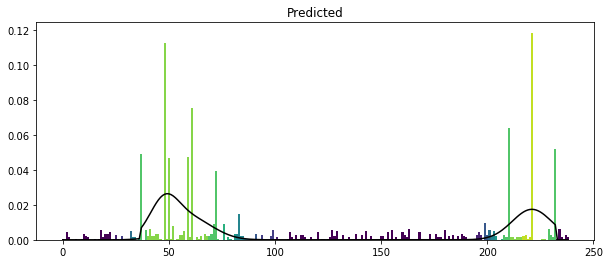

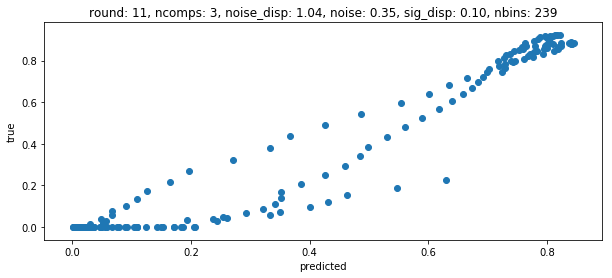

sim 1110/500000, loss: -0.9729, losses_av: -0.9728, 
sim 1120/500000, loss: -0.9517, losses_av: -0.9728, 
sim 1130/500000, loss: -0.9773, losses_av: -0.9728, 
sim 1140/500000, loss: -0.9821, losses_av: -0.9728, 
sim 1150/500000, loss: -0.9830, losses_av: -0.9728, 
sim 1160/500000, loss: -0.9785, losses_av: -0.9729, 
sim 1170/500000, loss: -0.9769, losses_av: -0.9729, 
sim 1180/500000, loss: -0.9664, losses_av: -0.9729, 
sim 1190/500000, loss: -0.9803, losses_av: -0.9730, 


KeyboardInterrupt: 

In [27]:
# first_run = 0

generator = RecordGenerator(n_obs=(500, 5000),
                            n_bins=(10, 700),
                            noise_ratio=(0.01, 0.5),
                            noise_dispersion=(0.05, 1.5),
                            rounding=list(range(1, 15)),
                            max_sigma_to_bins_ratio=0.25,
                            trim_corners=True)

nsims = 500000
X = []
Y = []
losses = []
lamb = 0.002
losses_av = []

bsize = 32

for sim in range(nsims):
    n_bins = np.random.randint(10, 601)
    Xbatch = []
    Ybatch = []
    for _ in range(bsize):
        data = generator.generate(n_bins=n_bins)
        x = np.array(data['counts'], dtype=np.float32)
        x /= x.sum()
        Xbatch.append(x)
        signal = data['signal_normalized']
        eps = data['noise_ratio']
        y = (1.0 - eps) * signal / ((1.0 - eps) * signal + eps * (1.0 / n_bins))
        Ybatch.append(y)
    Xbatch = tf.constant(np.expand_dims(np.stack(Xbatch, 0), -1), tf.float32)
    Ybatch = tf.constant(np.expand_dims(np.stack(Ybatch, 0), -1), tf.float32)
    loss = model.train_on_batch(Xbatch, Ybatch)
    losses.append(float(loss))
    if sim == 0:
        yhat = model(Xbatch)
        if first_run == 0:
            first_run = 1
            loss_ = loss
            losses_av = [loss_]
#             tv_ = tv2(yhat)
#             tv_trend_ = tv_trend(yhat)
#             kl_ = kl(Ybatch, yhat)
#             shrink_ = ridge(yhat)
#             ll_ = llhood(Ybatch, yhat)
        else:
            losses_av = [loss_]
    else:
        loss_ = lamb * losses[-1] + (1.0 - lamb) * losses_av[-1]
        losses_av.append(loss_)

#     yhat = model(Xbatch)
#     tv_ += lamb * (tv2(yhat) - tv_)
#     tv_trend_ += lamb * (tv_trend(yhat) - tv_trend_)
#     shrink_ += lamb * (ridge(yhat) - shrink_)
#     ll_ += lamb * (llhood(Ybatch, yhat) - ll_)
#     kl_ += lamb * (kl(Ybatch, yhat) - kl_)
        
    if sim == 0 or (sim + 1) % 10 == 0:
        print(f"sim {sim + 1}/{nsims}, loss: {losses[-1]:.4f}, losses_av: {losses_av[-1]:.4f}, ", end="")
#         print(f"tv: {tv_:.5f}, tv_trend: {tv_trend_:.5f}, ", end="")
#         print(f" shrink: {shrink_:.4f}, ll: {ll_:.4f}, KL: {kl_:.4f}, nbins: {n_bins}", end="")
        print("")
        
    loss_every = 500
    max_loss_range = 10000
    if (sim + 1) % loss_every == 0:
        plt.figure(figsize=(9, 4))
        n = len(losses_av)
        start = max(n - max_loss_range, 0) 
        plt.plot(range(start, n), losses_av[start:], c="red")
        plt.axvline(max(n - loss_every, 0), c="black")
        plt.show()

    if sim == 0 or (sim + 1) % 100 == 0:
        plot_test_case()
        
    if (sim + 1) % 100 == 0:
        model.save_weights("tmp_signal.h5")


In [ ]:

# plt.plot(losses)
plt.plot(losses_av, c="red")



In [ ]:
x, y, yhat = plot_test_case()

In [ ]:
plt.scatter(yhat, y)
plt.xlabel("prediction")
plt.ylabel("truth")
M = max(max(yhat), max(y))
plt.plot([0, M], [0, M], c="red")